# Welcome to Git-DS training 
- We are going to use a in house developed library to compute efficient portfolio (with 2 assets)
- Using Modern Portfolio Theory or the Markowitz Model
- Using real stocks and quotes from S&P 500 


### What is the modern portfolio theory? The financial theory behind the Markowitz Model

The modern portfolio theory (MPT) was developed in 1952 by Harry Markowitz, an American economist. The objective of the MPT is to maximize returns within  a calculated risk by analyzing various possible portfolios for a set of given securities. 

In other words, the Markowitz Model looks to create an efficient portfolio. An efficient portfolio is the one with the maximum possible return for any given level of risk.

Given 2 assets $A_1$, $A_2$, with expected retunns $R_1, $R_2$

### Financial basic concepts

We know all these financial terms might be a little confusing, so let's first try to understand some basic concepts. 

#### What is an asset? 
An asset is a resource with economic value that provides a future benefit. The most common financial assets are stocks or shares, which are a representation of the ownership of a fraction of a company. We have other types of assets too, the second most common would be bonds, which are a certificate of debt issue by a company, paper IOUs. But for this lab we will only focus on stocks. 

#### What is a portfolio? 
Is a collection of assets that is owned by one person or entity. It can be a collection of stocks from one or several companies. 

#### What is a return?
In finance a return is the financial gain or loss on an investment, how much the monetary value of an asset goes up or down. It is expressed as the change in the value of an investment over time. It can be either negative or positive. 

#### What is risk?
 Risk is defined as the chance that the investment's actual gains will differ from our expected outcome or return. Risk includes the possibility of losing some or all of an original investment.

#### How do we measure risk?

Financial risk is assessed by considering historical behaviors and outcomes. One of the most common metrics to measure how risky an asset is, is using the Standard Deviation of it's returns. The higher the standard deviation the riskier the asset is, this is because it is harder to predict what it's return will be.

#### Diversification - should we have a portfolio of several stocks or only a single kind of stock?

This is related to the diversification of risk. If we have only a single stock we are completly exposed to the performance of that stock. If it goes up in value it's great, but if it goes down then it's all bad. If we diversify in several stocks by making a portfolio, even when one of the stocks is loosing value, the other ones migth be having a positive return. This would mean that even when a particular stock is loosing value our portfolio in general might be increasing in value, due to the performance of other stocks. As they say, don't put all your eggs in one basket. 

#### What is an index?

In finance an index is a group of stocks that is being tracked. This group of stocks are selected using a specific criteria, usually the biggest companies in a specific financial market. For this lab we will use the S&P500 which tracks the performance of the biggest 500 US companies. 

## Before we get started a little history of "Function Utils"



For this lab we will use the library we developed in house, "function_utils". This library has all the classes and methods we need to calculate the efficient frontier of a portfolio composed of two or more stocks. 

This library was built using some universal packages, like: Pandas, Numpy, Matplotlib and Scipy

We also used a package that it's pretty common for financial analysis, Yahoo Finance.

From a high level we need to do the following:

    1-Download financial information for a single asset, using Asset class, will get to know how this information looks. 

    2-With Portfolio class, we will create a simple portfolio with 2 assets, we will do some exploratory analysis to see how it differs from an individual asset. 

    3-For the same portfolio we created before, we will calculate the efficient frontier and see how it is constructed and how it looks like in practice. 

### Let's get started

1-First we need to start by downloading the classes "Portfolio", "PortfolioManager" and "Asset" from function_utils library



In [14]:
from function_utils import Portfolio, PortfolioManager, Asset

### Asset class

The Asset class will help us to download financial information for a single stock. This method will mostly help us to observe with what information we are working, and observe some basic behaviour. 

We will need to pass the argument of a ticker of an S&P 500 company. 

Tickers are the codes that are used to call different companies in financial markets. For instance GOOGL is the ticker for Alphabet, and AAPL if the ticker for Apple.  If you want, you can check the complete list of companies that make the S&P 500, it even has some Deloitte clients!! like Johnson and Johnson, Broadcom and Mcdonals. This is the link with the full list -> https://www.slickcharts.com/sp500 


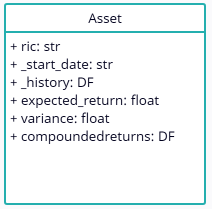


#### Get History Method

_get_history

First let's use the ticker you selected. 

This is the first method on the asset class, for this besided the ticket we will need to specify an start date from which we want to download the values from. If no argument is especified then it will download the information from jan 1st 2021 till today. 

At it's core financial information are time series. They usually have several columns with different prices, like open and close price, which are the prices the stock traded at when the market opened and closed. In this case we will drop every column but adjust price, which is the price we will use to perform all of our calculations. 

running the below commands we can see that if downloaded all the stock price quotes from the first date it had available


In [38]:
asset = Asset('GOOGL')
history_prices = asset._get_history("2023-01-01").reset_index()
print(history_prices)

pandas.core.frame.DataFrame

In [31]:
print(history_prices.max())
print(history_prices.min())

Date         2024-05-31 00:00:00
Adj Close             177.850006
dtype: object
Date         2023-01-03 00:00:00
Adj Close              86.199997
dtype: object


## Plot Time Series Method

plot_time_series 

We can also plot the time series we just download so we can observe the pattern it usually follows. 

C:\Users\jorge\AppData\Local\Temp\ipykernel_20964\2888223191.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


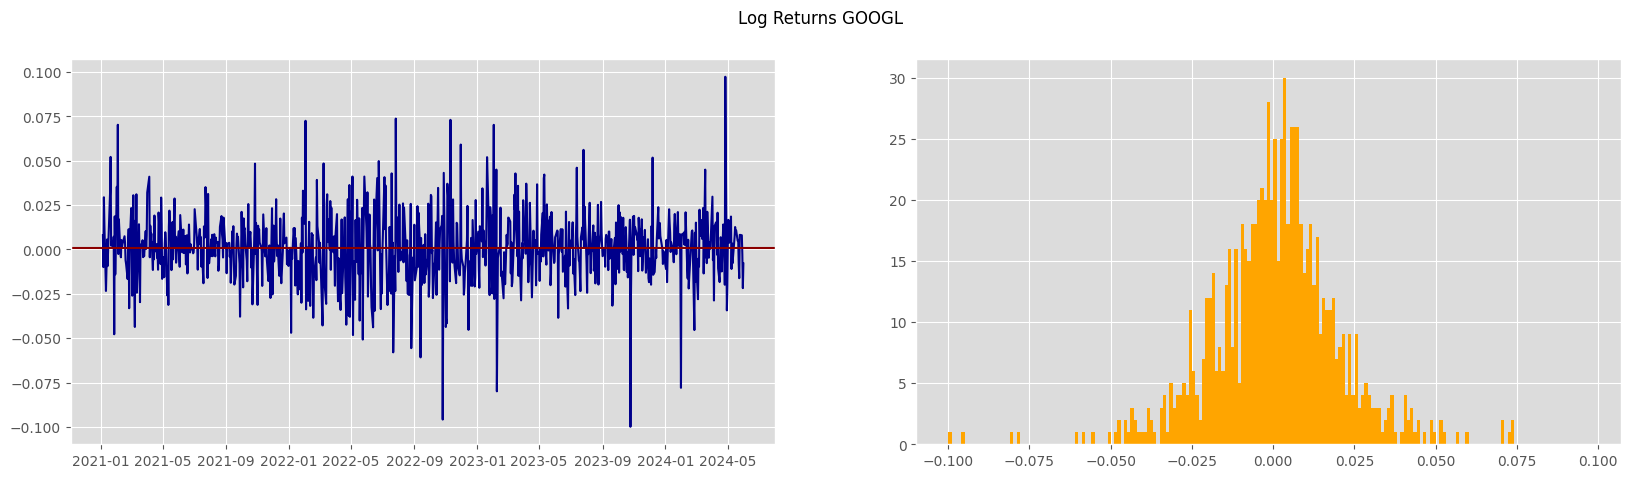

In [17]:
fig, ax = asset.plot_time_series()
fig.show()

If you observe closely we can see that the returns follow a normal distribution, which is a pretty standard bahaviour for a stock for a major company like Google. Since the more mature they are the less likely it its for the them to experience extreme returns. 

### _get_return and _get_variance methods

In the previous step we only downloaded information, now for the following steps we need to transform it. with these two methods we will calculate both the compunded returns and the variance for the stock. The compounded returns will help us see the return it had daily, negative or positive, while the variance will help us determine the level of risk for the stock. 

In [18]:
dfreturns = asset.compoundedreturns
print(dfreturns)

##lo que estas viendo arriba es returno diario

            Adj Close
Date                 
2021-01-04        NaN
2021-01-05   0.008032
2021-01-06  -0.009917
2021-01-07   0.029431
2021-01-08   0.013152
...               ...
2024-05-24   0.008263
2024-05-28   0.008025
2024-05-29  -0.002838
2024-05-30  -0.021782
2024-05-31  -0.007924

[858 rows x 1 columns]


## Portfolio Class

After using the Asset Class to explore how a single asset is represented and what kind of information we can calculate using it,the Method class will construct an actual portfolio that we will get to explore what kind of information we can calculate from it.  

For the Portfolio class we need to define some attributes, first we would need to pass two different tickers and the weight each asset would have in the portfolio. 
With weight we are trying to define the proportion each asset is going to take up in the portfolio. For instance we can have 90% Google stocks and 10% Apple stocks, or perhaps we can go for a 50-50 split. We just need to keep in mind that the sum of both weights should be equal to 1, as this would represent the 100% of the possible weight we can distribute.  

In [20]:
tickernames = ['GOOGL', 'AAPL']
base_portfolio = Portfolio(tickernames, weights=[0.5, 0.5])
print(base_portfolio)

Portfolio(Assets=[GOOGL, AAPL], Weights=[0.5, 0.5])


Get History Method

The get history method allows us to bring back the historical information for prices for both the stocks that make up the portfolio. 

In [21]:
base_portfolio.get_history()

,Date,GOOGL,AAPL
0,2021-01-04,86.306503,126.830086
1,2021-01-05,87.002502,128.398163
2,2021-01-06,86.143997,124.076088
3,2021-01-07,88.717003,128.309982
4,2021-01-08,89.891502,129.417450
...,...,...,...
853,2024-05-24,174.990005,189.979996
854,2024-05-28,176.399994,189.990005
855,2024-05-29,175.899994,190.289993
856,2024-05-30,172.110001,191.289993


### Get Covariance Matrix Method

get_cov_method()

Using the get covariance matrix method we will calculate the covariance matrix that the stocks have between each other. This will allow us to see if the returns for both of these stocks are correlated, this can happen when the two companies are on the same industry, since they are both competing in the same market and are exposed to many of the same risk. 
Usually in finance we try to have some degree of diversification in our portfolio, to avoid being exposed to a single kind of industry. But these can change depending on our investing strategy. 


In [22]:
base_portfolio.get_cov_matrix()

,GOOGL,AAPL
GOOGL,0.000394,0.000215
AAPL,0.000215,0.000293


#### Get Return Method

get_return() 

Now is where things get interesting, how much money are we making?
Using the get return method we are calculating, based on both the weight and the expected return each stock has, the expected daily return we could expect for our portfolio. 

In [23]:
base_portfolio.get_return()

0.000636

## Portfolio Manager Class

Now we will explore the last class of the the function utils library, Manager Class

Hopefully you liked the return you obtained on the portfolio we calculated before, but have you thought about how much risk you were taking? 

The Portfolio Manager class is really as it's name suggest a portfolio manager. Using this method we will create an efficient portfolio, this is a portfolio that offers the best return for a given level of risk. For this call we will use the same portfolio we just calculated before. 



In [24]:
markowitzmanager = PortfolioManager('markowitz', base_portfolio)


### Get Markowitz Weights Method

get_markowitz_weights

What is the weight for a specific return?

Let's do a little test, let's say that we want to calculate the exact weights we need to obtained a specific return. For instance let's say that we want to obtain a 30% yearly return using the portfolio we just created, using the get markowitz method we can do just that. The only argument we need to pass on is the return level that we want to obtain and it will show us the weights we would need to allocate to each asset in our portfolio. 

In [25]:
markowitzmanager.get_markowitz_weights(.2)

array([0.99881099, 0.00118901])

## Plot Efficient Frontier Method

plot_efficient_frontier

Using this method we can plot the efficient frontier. This means that this would show us the graph in which we can see the point in a graph that is the most efficient for any given level of volatily or risk. 

C:\Users\jorge\AppData\Local\Temp\ipykernel_20964\3219686999.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


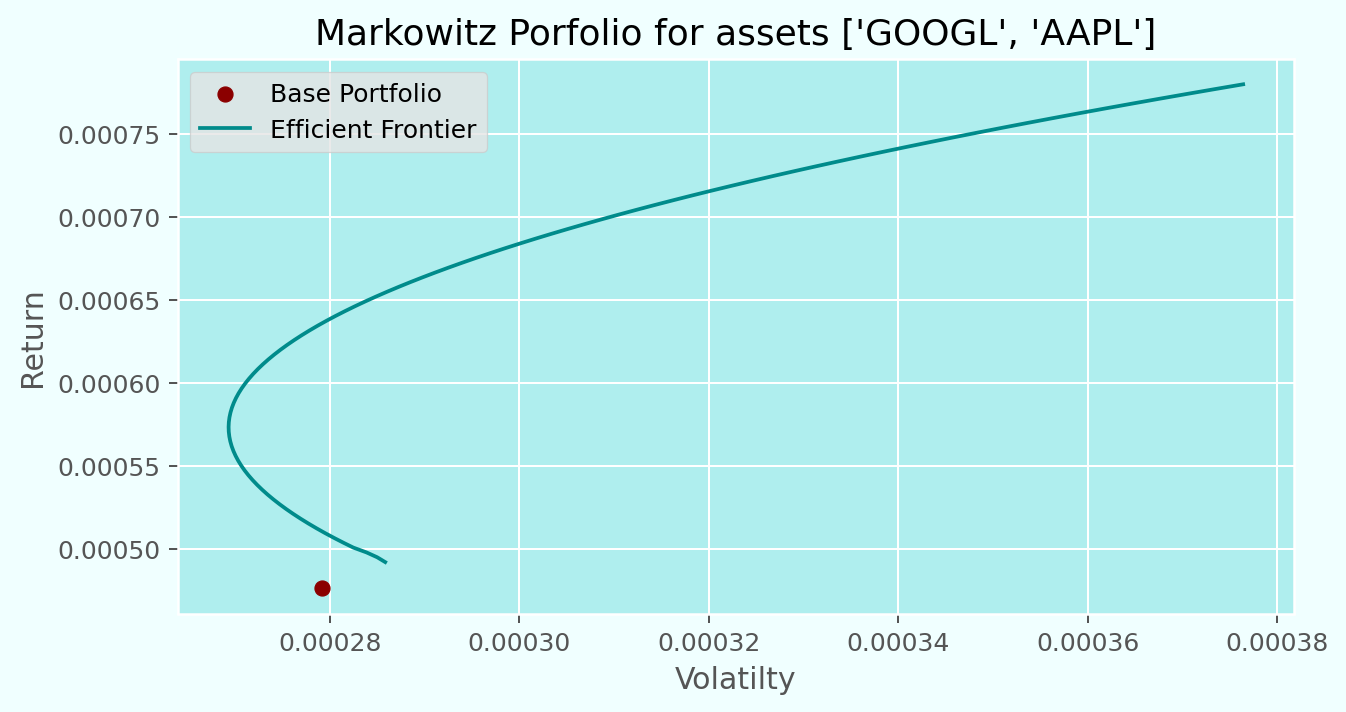

In [26]:
fig, ax = markowitzmanager.plot_efficient_frontier()
fig.show()